<a href="https://colab.research.google.com/github/DanielaSerrato/PythonEjercicios/blob/master/Cami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import *
import datetime as dt
from time import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
#Leer el archivo
Data=pd.read_csv('/content/Encuesta_de_movilidad_de_Bogot__2015___Caracterizaci_n_viajes___Origen_Destino.csv')

In [3]:
Data.head()

,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,FACTOR_AJUSTE,PONDERADOR_CALIBRADO,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,PI_K_I,PI_K_II,PI_K_III,FE_TOTAL,FACTOR_AJUSTE_TRANSMILENIO,PONDERADOR_CALIBRADO_VIAJES
0,18390069,2.0,1.0,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,8.800390e+14,1.108273e+14,S,NaN,NaN,NaN,NaN,NaN,3.205606e+14,3.928571e+14,1.0,1.259345e+14,1.202936e+14,1.333182e+14
1,18390069,2.0,2.0,Volver a casa,BOGOTA-DC 11001,Bogota D.C.,10.0,10:21:05,12:11:05,TPC-SITP,566.0,238.0,BOGOTA-DC 11001,Bogota D.C.,4.650268e+13,4.613055e+13,-7.406759e+13,-7.419059e+13,01:50:00,8.800390e+14,1.108273e+14,S,NaN,NaN,NaN,NaN,S,3.205606e+14,3.928571e+14,1.0,1.259345e+14,1.202936e+14,1.333182e+14
2,18390069,3.0,1.0,Estudiar,BOGOTA-DC 11001,Bogota D.C.,10.0,06:27:00,06:45:00,PEATON,564.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.615613e+13,-7.419059e+13,-7.419014e+13,00:18:00,8.800390e+14,1.108273e+14,S,NaN,S,NaN,NaN,NaN,3.205606e+14,3.928571e+14,1.0,1.259345e+14,1.202936e+14,1.333182e+14
3,18390069,3.0,2.0,Volver a casa,BOGOTA-DC 11001,Bogota D.C.,10.0,08:46:27,09:41:27,PEATON,566.0,564.0,BOGOTA-DC 11001,Bogota D.C.,4.615613e+13,4.613055e+13,-7.419014e+13,-7.419059e+13,00:55:00,8.800390e+14,1.108273e+14,S,NaN,NaN,NaN,NaN,NaN,3.205606e+14,3.928571e+14,1.0,1.259345e+14,1.202936e+14,1.333182e+14
4,18390891,1.0,1.0,Trabajar,BOGOTA-DC 11001,Bogota D.C.,7.0,07:47:00,09:19:00,MOTO,138.0,227.0,BOGOTA-DC 11001,Bogota D.C.,4.657764e+13,4.689988e+13,-7.407483e+13,-7.406549e+13,01:32:00,6.215408e+13,4.059711e+14,S,NaN,NaN,NaN,NaN,NaN,1.492957e+14,4.375000e+03,1.0,6.531689e+14,1.202936e+14,4.883575e+14


In [4]:
Data.columns

Index(['ID_ENCUESTA', 'NUMERO_PERSONA', 'NUMERO_VIAJE', 'MOTIVOVIAJE',
       'MUNICIPIO_DESTINO', 'DEPARTAMENTO_DESTINO', 'TIEMPO_CAMINO',
       'HORA_INICIO', 'HORA_FIN', 'MEDIO_PREDOMINANTE', 'ZAT_DESTINO',
       'ZAT_ORIGEN', 'MUNICIPIO_ORIGEN', 'DEPARTAMENTO_ORIGEN',
       'LATITUD_ORIGEN', 'LATITUD_DESTINO', 'LONGITUD_ORIGEN',
       'LONGITUD_DESTINO', 'DIFERENCIA_HORAS', 'FACTOR_AJUSTE',
       'PONDERADOR_CALIBRADO', 'DIA_HABIL', 'DIA_NOHABIL', 'PICO_HABIL',
       'PICO_NOHABIL', 'VALLE_NOHABIL', 'VALLE_HABIL', 'PI_K_I', 'PI_K_II',
       'PI_K_III', 'FE_TOTAL', 'FACTOR_AJUSTE_TRANSMILENIO',
       'PONDERADOR_CALIBRADO_VIAJES'],
      dtype='object')

In [40]:
Data['DIFERENCIA_HORAS']=pd.to_timedelta(Data['DIFERENCIA_HORAS'])
Data['HORA_INICIO']=pd.to_datetime(Data['HORA_INICIO']).round('60 min')
#Pasar de formato de HH:MM:SS a minutos
Data['DIFERENCIA_HORAS']=Data['DIFERENCIA_HORAS']/ np.timedelta64(1, "m")




In [28]:
Data['HORA_INICIO']

0        2021-11-08 08:00:00
1        2021-11-08 10:00:00
2        2021-11-08 06:00:00
3        2021-11-08 09:00:00
4        2021-11-08 08:00:00
                 ...        
147246   2021-11-08 18:00:00
147247   2021-11-08 06:00:00
147248   2021-11-08 14:00:00
147249   2021-11-08 04:00:00
147250   2021-11-08 18:00:00
Name: HORA_INICIO, Length: 147251, dtype: datetime64[ns]

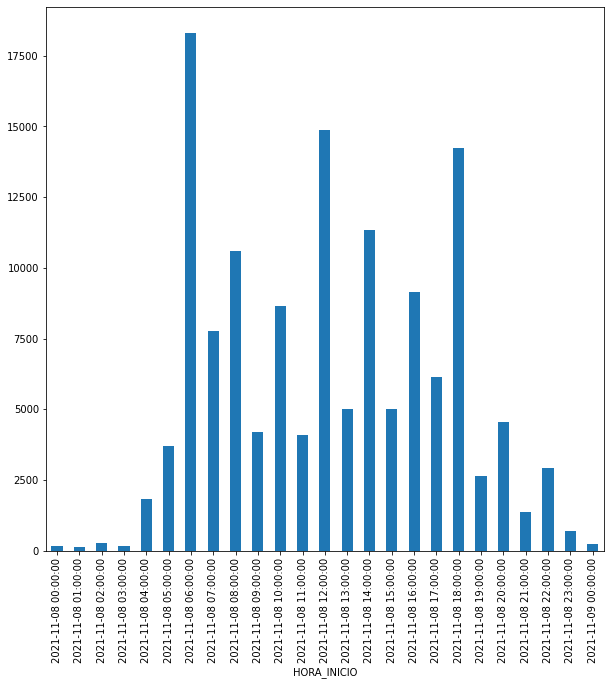

In [34]:
prueba1=Data.groupby(['HORA_INICIO'])['DIFERENCIA_HORAS'].count()
plt.figure(figsize=(10, 10))
prueba1.plot(kind='bar') 

In [8]:
DataMFM=Data.loc[(Data["MUNICIPIO_ORIGEN"]=="MOSQUERA-cundinamarca 25473")|(Data["MUNICIPIO_ORIGEN"]=="MADRID-cundinamarca 25430")|(Data["MUNICIPIO_ORIGEN"]=="FUNZA-cundinamarca 25286")]
DataMFM=DataMFM.loc[(DataMFM["MUNICIPIO_DESTINO"]=="BOGOTA-DC 11001")]
DataMFM.head()


,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,FACTOR_AJUSTE,PONDERADOR_CALIBRADO,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,PI_K_I,PI_K_II,PI_K_III,FE_TOTAL,FACTOR_AJUSTE_TRANSMILENIO,PONDERADOR_CALIBRADO_VIAJES
83,18393181,1.0,2.0,Volver a casa,BOGOTA-DC 11001,Bogota D.C.,6.0,2021-11-08 11:30:00,13:46:00,ESPECIAL,411.0,900.0,MOSQUERA-cundinamarca 25473,Cundinamarca,47102423.0,4.641298e+13,-742144199.0,-7.416191e+13,140.000000,6.390267e+14,2.759664e+13,NaN,S,NaN,NaN,S,NaN,1.472230e+14,4.888889e+14,6.0,4.318543e+14,1.202936e+14,3.319701e+14
295,18475430,2.0,2.0,Trabajar,BOGOTA-DC 11001,Bogota D.C.,4.0,2021-11-08 13:00:00,14:12:00,TPC-SITP,112.0,902.0,MADRID-cundinamarca 25430,Cundinamarca,47335737.0,4.731624e+13,-742643772.0,-7.409905e+13,65.000000,5.561041e+14,8.899586e+14,S,NaN,NaN,NaN,NaN,NaN,4.572416e+14,3.500000e+01,1.0,1.600345e+14,1.202936e+14,1.070564e+14
546,18477469,2.0,2.0,Volver a casa,BOGOTA-DC 11001,Bogota D.C.,NaN,2021-11-08 08:30:00,09:48:35,TPC-SITP,399.0,901.0,FUNZA-cundinamarca 25286,Cundinamarca,47167432.0,4.674626e+12,-742117265.0,-7.415029e+13,66.883333,4.313370e+13,5.007314e+14,S,NaN,NaN,NaN,NaN,NaN,2.902205e+14,4.000000e+00,1.0,1.160882e+14,1.202936e+14,6.023481e+14
578,18477479,1.0,2.0,Volver a casa,BOGOTA-DC 11001,Bogota D.C.,5.0,2021-11-08 17:00:00,20:00:00,Transmilenio,117.0,902.0,MADRID-cundinamarca 25430,Cundinamarca,47335737.0,4.746661e+13,-742643772.0,-7.412158e+12,180.000000,5.561041e+14,8.899586e+13,S,NaN,NaN,NaN,NaN,NaN,2.546004e+14,6.285714e+14,1.0,1.600345e+14,1.202936e+14,1.070564e+14
2359,18514179,1.0,2.0,Volver a casa,BOGOTA-DC 11001,Bogota D.C.,0.0,2021-11-08 14:00:00,16:01:00,MOTO,627.0,900.0,MOSQUERA-cundinamarca 25473,Cundinamarca,47102423.0,4.576436e+13,-742144199.0,-7.414971e+13,110.000000,6.193529e+14,4.449672e+14,S,NaN,NaN,NaN,NaN,NaN,7.043519e+14,3.400000e+01,3.0,7.184390e+14,1.202936e+14,5.352673e+14


In [13]:
DatosagrupadosMedio=DataMFM.groupby(['MEDIO_PREDOMINANTE','MUNICIPIO_ORIGEN'])['ID_ENCUESTA'].nunique()
DatosagrupadosMedio= DatosagrupadosMedio.reset_index() 


Text(0.5, 1.0, 'pichurris')

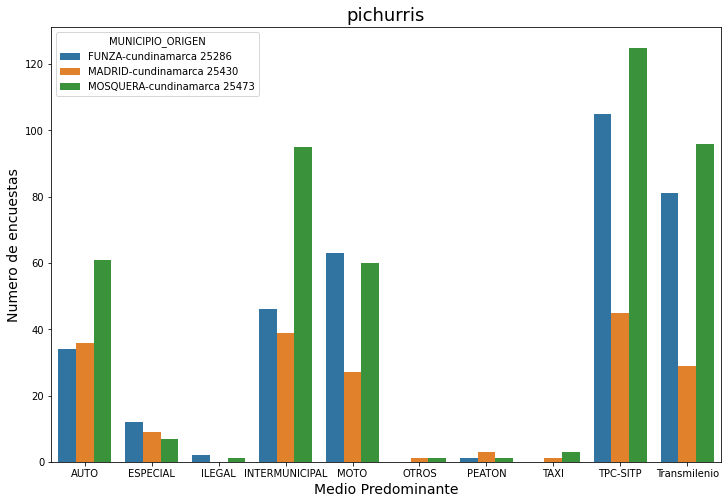

In [14]:
plt.figure(figsize=(12, 8)) 
sns.barplot(x='MEDIO_PREDOMINANTE', y='ID_ENCUESTA', 
            hue='MUNICIPIO_ORIGEN', data=DatosagrupadosMedio
          ) 
  
plt.ylabel("Numero de encuestas", size=14) 
plt.xlabel("Medio Predominante", size=14) 
plt.title("pichurris", size=18) 

In [15]:
DatosagrupadosDuracion=DataMFM.groupby(['MEDIO_PREDOMINANTE','MUNICIPIO_ORIGEN'])['DIFERENCIA_HORAS'].mean()
DatosagrupadosDuracion= DatosagrupadosDuracion.reset_index() 


Text(0.5, 1.0, 'pichurris 2')

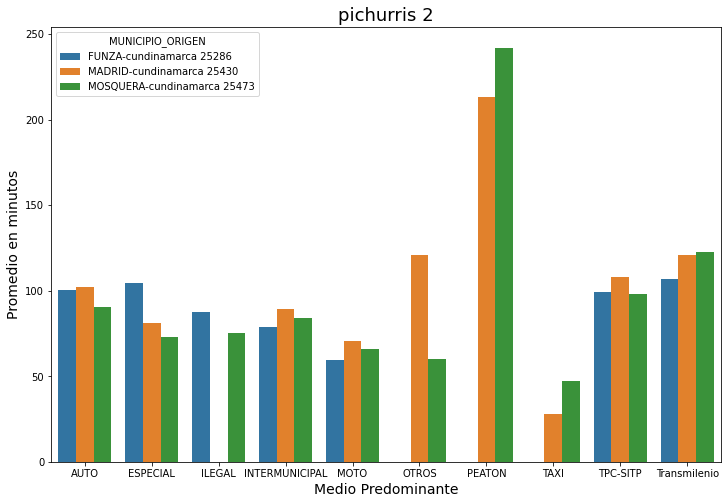

In [16]:
plt.figure(figsize=(12, 8)) 
sns.barplot(x='MEDIO_PREDOMINANTE', y='DIFERENCIA_HORAS', 
            hue='MUNICIPIO_ORIGEN', data=DatosagrupadosDuracion
          ) 
  
plt.ylabel("Promedio en minutos", size=14) 
plt.xlabel("Medio Predominante", size=14) 
plt.title("pichurris 2", size=18) 

Text(0.5, 1.0, 'pichurris 3')

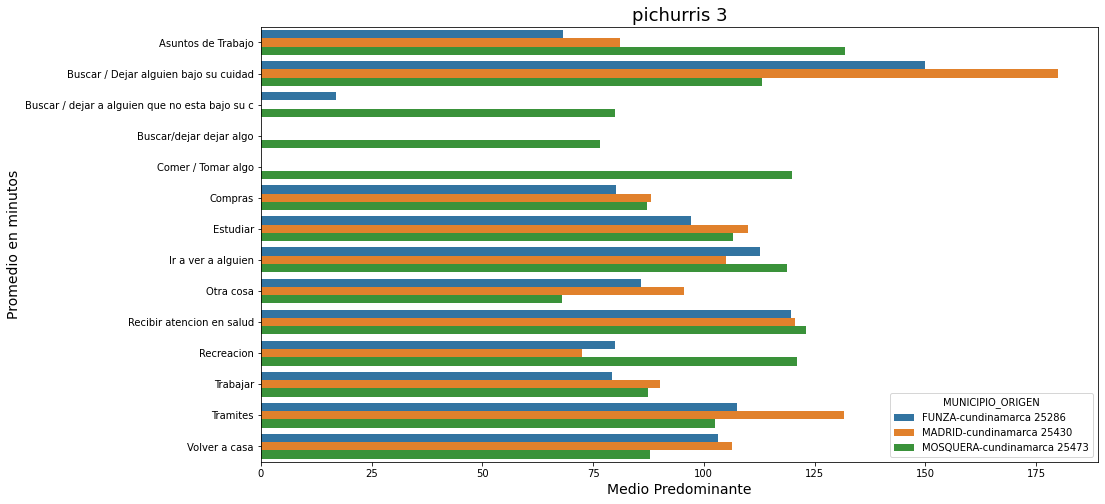

In [17]:
DatosagrupadosMotivo=DataMFM.groupby(['MOTIVOVIAJE','MUNICIPIO_ORIGEN'])['DIFERENCIA_HORAS'].mean()
DatosagrupadosMotivo= DatosagrupadosMotivo.reset_index() 
plt.figure(figsize=(15,8 )) 
sns.barplot(x='DIFERENCIA_HORAS', y='MOTIVOVIAJE', 
            hue='MUNICIPIO_ORIGEN', data=DatosagrupadosMotivo
          ) 
  
plt.ylabel("Promedio en minutos", size=14) 
plt.xlabel("Medio Predominante", size=14) 
plt.title("pichurris 3", size=18) 

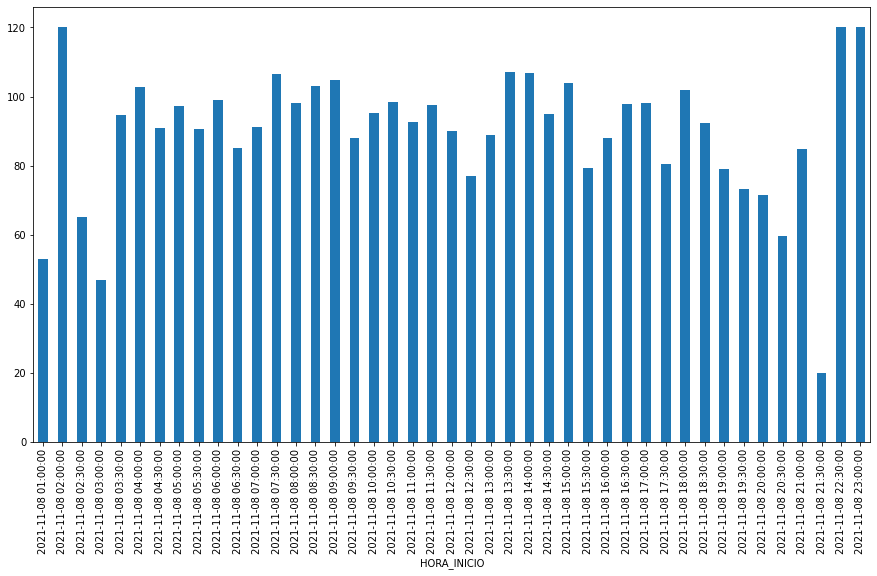

In [38]:
DatosagrupadosDuracionxHora=DataMFM.groupby(['HORA_INICIO'])['DIFERENCIA_HORAS'].mean()

plt.figure(figsize=(15,8 )) 
DatosagrupadosDuracionxHora.plot(kind='bar')